In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

#Read Seattle CSV files 
seattle_calander_df = pd.read_csv('./dataset/seattle/calendar.csv', dtype=str)
seattle_listings_df = pd.read_csv('./dataset/seattle/listings.csv', dtype=str)
seattle_reviews_df = pd.read_csv('./dataset/seattle/reviews.csv', dtype=str)

seattle_calander_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [2]:
seattle_listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [3]:
seattle_reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [4]:
#Read Boston CSV files 
boston_calander_df = pd.read_csv('./dataset/boston/calendar.csv', dtype=str)
boston_listings_df = pd.read_csv('./dataset/boston/listings.csv', dtype=str)
boston_reviews_df = pd.read_csv('./dataset/boston/reviews.csv', dtype=str)

boston_calander_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
boston_listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10,f,NaN,NaN,f,moderate,f,f,1,1
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10,f,NaN,NaN,f,flexible,f,f,1,2.25


In [6]:
boston_reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:

    # Questions to ask:
    # * Anticipated visitors to Seattle/Boston over time (based on non-availability of listings)?
    #  - date, accommodates (columns)
    # * Areas that are more likely to be crowded/ areas that are more likely to be 
    #   preferred by people (based on the number of bookings)?
    #  - neighbourhood, zipcode (columns)
    # * The busiest time to visit Seattle/Boston?
    #  - date, accommodates (columns) : Seattle-July, Boston-March.
    # * Compare the average daily price of listings for a month over time (between the two cities).
    #  - price, date, weekly_price, monthly_price (columns) from calendar.csv
    # * Predict the price of listings for Seattle/Boston.
    #  - property_type, room_type, neighbourhood, zipcode, accommodates, 
    #  bathrooms, bedrooms, beds, cleaning fee, instant_bookable, 
    #  cancellation_policy (columns or more) 


In [8]:
def seattle_clean_data():
    
    """Renaming column 'id' to 'listing_id' in dataframe 'seattle_listings_df'""" 
    seattle_listings_df.rename(columns={"id": "listing_id"}, inplace=True)
    
    """Removing '$' and ',' symbol from the column 'price' in dataframe
    'seattle_calander_df'""" 
    seattle_calander_df['price'] = seattle_calander_df['price'].str.replace('$', '')
    seattle_calander_df['price'] = seattle_calander_df['price'].str.replace(',', '')
    
    """Removing '$' and ',' symbol from the columns 'price' and 'cleaning fee'
    in dataframe 'seattle_listings_df'"""
    seattle_listings_df['price'] = seattle_listings_df['price'].str.replace('$', '')
    seattle_listings_df['cleaning_fee'] = seattle_listings_df['cleaning_fee'].str.replace('$', '')
    seattle_listings_df['price'] = seattle_listings_df['price'].str.replace(',', '')
    
    """Removing '99\n' symbol from the column 'zipcode' in dataframe 'seattle_listings_df'"""
    seattle_listings_df["zipcode"] = seattle_listings_df["zipcode"].str.replace('99\n','')

    """convert columns 'price', 'accommodates', 'zipcode' 'bathrooms', 'bedrooms', 'beds', 
    'cleaning_fee'in dataframes 'seattle_calander_df', 'seattle_listings_df' to numeric type""" 
    seattle_calander_df["price"] = pd.to_numeric(seattle_calander_df["price"])
    seattle_listings_df["price"] = pd.to_numeric(seattle_listings_df["price"])
    seattle_listings_df["accommodates"] = pd.to_numeric(seattle_listings_df["accommodates"])
    seattle_listings_df["bathrooms"] = pd.to_numeric(seattle_listings_df["bathrooms"])
    seattle_listings_df["bedrooms"] = pd.to_numeric(seattle_listings_df["bedrooms"])
    seattle_listings_df["beds"] = pd.to_numeric(seattle_listings_df["beds"])
    seattle_listings_df["cleaning_fee"] = pd.to_numeric(seattle_listings_df["cleaning_fee"])
    
    """filling missing values for the column 'price' in dataframe 'seattle_calander_df'"""
    seattle_calander_df.sort_values(['listing_id'], inplace=True)
    seattle_calander_df['price'].fillna(method='ffill', inplace=True)

    """filling missing values for the columns 'neighbourhood', 'zipcode', 'bedrooms',
    'beds' and 'property_type' in dataframe 'seattle_listings_df'"""
    seattle_listings_df['neighbourhood_filled'] = seattle_listings_df.groupby('zipcode')\
    ['neighbourhood'].fillna(method='ffill').fillna(method='bfill')
    seattle_listings_df['zipcode_filled'] = seattle_listings_df.groupby('neighbourhood')\
    ['zipcode'].fillna(method='ffill').fillna(method='bfill')
    seattle_listings_df['bathrooms_filled'] = seattle_listings_df.groupby('room_type')\
    ['bathrooms'].fillna(method='ffill').fillna(method='bfill')
    seattle_listings_df['bedrooms_filled'] = seattle_listings_df.groupby('accommodates')\
    ['bedrooms'].fillna(method='ffill').fillna(method='bfill')
    seattle_listings_df['beds_filled'] = seattle_listings_df.groupby('accommodates')\
    ['beds'].fillna(method='ffill').fillna(method='bfill')
    seattle_listings_df['property_type'] = seattle_listings_df\
    ['property_type'].fillna(method='ffill').fillna(method='bfill')
      
    mean = lambda x: x.fillna(x.mean())
    """filling missing values for the column 'cleaning_fee' in dataframe 
    'seattle_listings_df'"""    
    seattle_listings_df['cleaning_fee_filled'] = seattle_listings_df.groupby('price')\
    ['cleaning_fee'].apply(mean)
    
    """filling remaining missing values for the column 'cleaning_fee' in dataframes 
    'seattle_listings_df' with the mode"""
    value = int(seattle_listings_df['cleaning_fee_filled'].mode())
    seattle_listings_df['cleaning_fee_filled'].fillna(value, inplace=True)

    
def seattle_add_columns():
    
    """adding columns for month and year in dataframes 'seattle_calander_df'"""
    func_month = lambda x: x.split('-')[1] 
    func_year = lambda x: x.split('-')[0] 

    seattle_calander_df['month'] = pd.to_numeric(seattle_calander_df['date'].apply(func_month))
    seattle_calander_df['year'] = pd.to_numeric(seattle_calander_df['date'].apply(func_year))

seattle_clean_data() 
seattle_add_columns()

In [9]:
def boston_clean_data():
    """Renaming column 'id' to 'listing_id' in dataframes 'seattle_listings_df'
    and 'boston_calander_df'""" 

    boston_listings_df.rename(columns={"id": "listing_id"}, inplace=True)
    
    """Removing '$' and ',' symbol from the column 'price' in dataframe
    'boston_calander_df'""" 
    boston_calander_df['price'] = boston_calander_df['price'].str.replace('$', '')
    boston_calander_df['price'] = boston_calander_df['price'].str.replace(',', '')
    
    """Removing '$' and ',' symbol from the columns 'price' and 'cleaning fee'
    in dataframe 'boston_listings_df'"""
    boston_listings_df['price'] = boston_listings_df['price'].str.replace('$', '')
    boston_listings_df['cleaning_fee'] = boston_listings_df['cleaning_fee'].str.replace('$', '')
    boston_listings_df['price'] = boston_listings_df['price'].str.replace(',', '')

    """Removing '02108 02111' symbol from the column 'zipcode' in dataframe 
    'boston_listings_df'"""
    boston_listings_df["zipcode"] = boston_listings_df["zipcode"].str.replace(' 02111','')
    """Removing '02134-1704' symbol from the column 'zipcode' in dataframe 
    'boston_listings_df'"""
    boston_listings_df["zipcode"] = boston_listings_df["zipcode"].str.replace('-1704','')

    """Convert columns 'price', 'accommodates', 'zipcode' 'bathrooms', 'bedrooms', 'beds', 
    'cleaning_fee'in dataframes 'boston_calander_df' and 'boston_listings_df' to numeric
    type""" 
    boston_calander_df["price"] = pd.to_numeric(boston_calander_df["price"])
    boston_listings_df["price"] = pd.to_numeric(boston_listings_df["price"])
    boston_listings_df["accommodates"] = pd.to_numeric(boston_listings_df["accommodates"])
    boston_listings_df["bathrooms"] = pd.to_numeric(boston_listings_df["bathrooms"])
    boston_listings_df["bedrooms"] = pd.to_numeric(boston_listings_df["bedrooms"])
    boston_listings_df["beds"] = pd.to_numeric(boston_listings_df["beds"])
    boston_listings_df["cleaning_fee"] = pd.to_numeric(boston_listings_df["cleaning_fee"])
    
    """Filling missing values for the column 'price' in dataframes 'boston_calander_df'"""
    boston_calander_df.sort_values(['listing_id'], inplace=True)
    boston_calander_df['price'].fillna(method='bfill', inplace=True)
    boston_calander_df['price'].fillna(method='ffill', inplace=True) 

    """Filling missing values for the columns 'neighbourhood', 'zipcode', 'bedrooms',
    'beds' and 'property_type' in dataframe 'boston_listings_df'"""
    boston_listings_df['neighbourhood_filled'] = boston_listings_df.groupby('zipcode')\
    ['neighbourhood'].fillna(method='ffill').fillna(method='bfill')
    boston_listings_df['zipcode_filled'] = boston_listings_df.groupby('neighbourhood')\
    ['zipcode'].fillna(method='ffill').fillna(method='bfill')
    boston_listings_df['bathrooms_filled'] = boston_listings_df.groupby('room_type')\
    ['bathrooms'].fillna(method='ffill').fillna(method='bfill')
    boston_listings_df['bedrooms_filled'] = boston_listings_df.groupby('accommodates')\
    ['bedrooms'].fillna(method='ffill').fillna(method='bfill')
    boston_listings_df['beds_filled'] = boston_listings_df.groupby('accommodates')\
    ['beds'].fillna(method='ffill').fillna(method='bfill')
    boston_listings_df['property_type'] = boston_listings_df\
    ['property_type'].fillna(method='ffill').fillna(method='bfill')
      
    mean = lambda x: x.fillna(x.mean())
    """Filling missing values for the column 'cleaning_fee' in dataframes 
    'boston_listings_df'"""    
    boston_listings_df['cleaning_fee_filled'] = boston_listings_df.groupby('price')\
    ['cleaning_fee'].apply(mean)
    
    """Filling remaining missing values for the column 'cleaning_fee' in dataframes 
    'boston_listings_df' with the mode"""
    value = int(boston_listings_df['cleaning_fee_filled'].mode())
    boston_listings_df['cleaning_fee_filled'].fillna(value, inplace=True)
    
    
def boston_add_columns():
    
    """adding columns for month and year in dataframe 'boston_calander_df'"""
    func_month = lambda x: x.split('-')[1] 
    func_year = lambda x: x.split('-')[0] 

    boston_calander_df['month'] = pd.to_numeric(boston_calander_df['date'].apply(func_month))
    boston_calander_df['year'] = pd.to_numeric(boston_calander_df['date'].apply(func_year))

    
boston_clean_data() 
boston_add_columns()

In [10]:
"""Compare the average daily price of listings for a month over time (between the two cities)."""

#Check if there are any NaN values in the column 'price' in dataframes 
#'seattle_calander_df' and 'boston_calander_df'"""
seattle_calander_df[seattle_calander_df['price'].isna() == True]
boston_calander_df[boston_calander_df['price'].isna() == True]

,listing_id,date,available,price,month,year


In [11]:
seattle_calander_df.head()

,listing_id,date,available,price,month,year
1166174,10000273,2017-01-02,t,175.0,1,2017
1165926,10000273,2016-04-29,t,200.0,4,2016
1165927,10000273,2016-04-30,t,200.0,4,2016
1165928,10000273,2016-05-01,t,175.0,5,2016
1165929,10000273,2016-05-02,t,175.0,5,2016


In [12]:
#Selecting only the year 2016
seattle_calander_df = seattle_calander_df[seattle_calander_df['year'] == 2016]
#boston_calander_df = boston_calander_df[boston_calander_df['year'] == 2017]

In [13]:
seattle_calander_df.head()

,listing_id,date,available,price,month,year
1165926,10000273,2016-04-29,t,200.0,4,2016
1165927,10000273,2016-04-30,t,200.0,4,2016
1165928,10000273,2016-05-01,t,175.0,5,2016
1165929,10000273,2016-05-02,t,175.0,5,2016
1165930,10000273,2016-05-03,t,175.0,5,2016


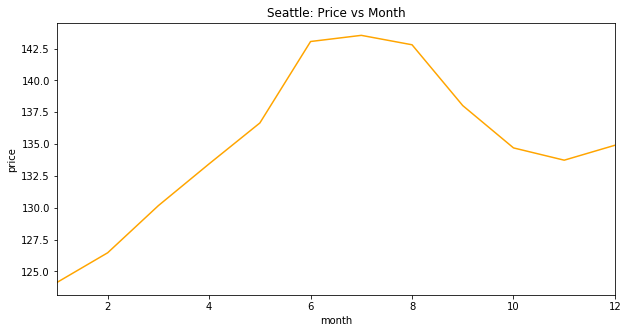

In [14]:
#Line plot for the average daily price for a month over a year for Seattle
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Seattle: Price vs Month')
ax.set_xlabel('month')
ax.set_ylabel('price')

seattle_calander_df.groupby('month')['price'].mean().plot(kind='line', color='orange', ax=ax)
fig.savefig('seattle_price_vs_month.png', dpi=200)

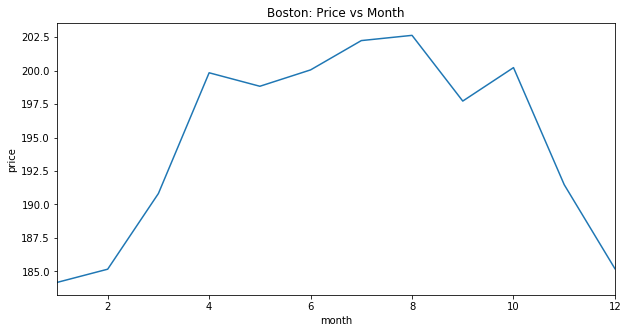

In [15]:
#Line plot for the average daily price for a month over a year for Boston
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Boston: Price vs Month')
ax.set_xlabel('month')
ax.set_ylabel('price')
boston_calander_df.groupby('month')['price'].mean().plot(kind='line', ax=ax)
fig.savefig('boston_price_vs_month.png', dpi=200)

In [16]:
"""Anticipated visitors to Seattle/Boston over time (based on non-availability of listings)?"""

#Find the rows which has 'availability' column as 'f'
seattle_booked_df =  seattle_calander_df[seattle_calander_df['available'] == 'f']
boston_booked_df =  boston_calander_df[boston_calander_df['available'] == 'f'] 

In [17]:
#Merge dataframes 'df_seattle_booked' and 'seattle_listings_df'
seattle_merged_df = pd.merge(seattle_booked_df, seattle_listings_df, on=['listing_id'])

#Merge dataframes 'df_boston_booked' and 'seattle_listings_df'
boston_merged_df = pd.merge(boston_booked_df, boston_listings_df, on=['listing_id'])

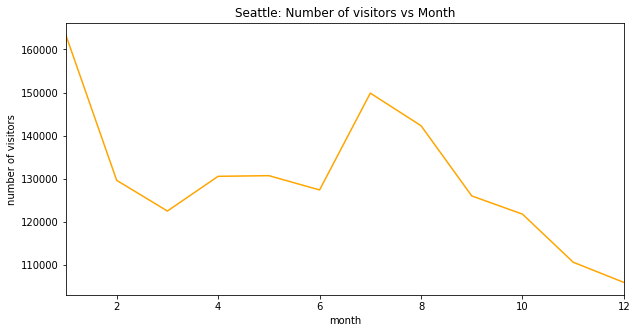

In [18]:
#Line plot for predicted visitors to Seattle over time
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Seattle: Number of visitors vs Month')
ax.set_xlabel('month')
ax.set_ylabel('number of visitors')
seattle_merged_df.groupby('month')['accommodates'].sum().plot(kind='line', color='orange', ax=ax)

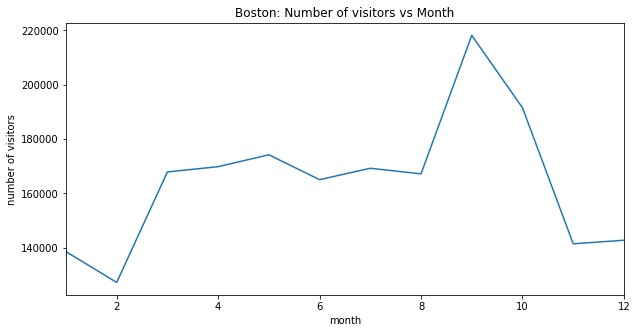

In [19]:
#Line plot for predicted visitors to Boston over time
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_title('Boston: Number of visitors vs Month')
ax.set_xlabel('month')
ax.set_ylabel('number of visitors')
boston_merged_df.groupby('month')['accommodates'].sum().plot(kind='line', ax=ax)

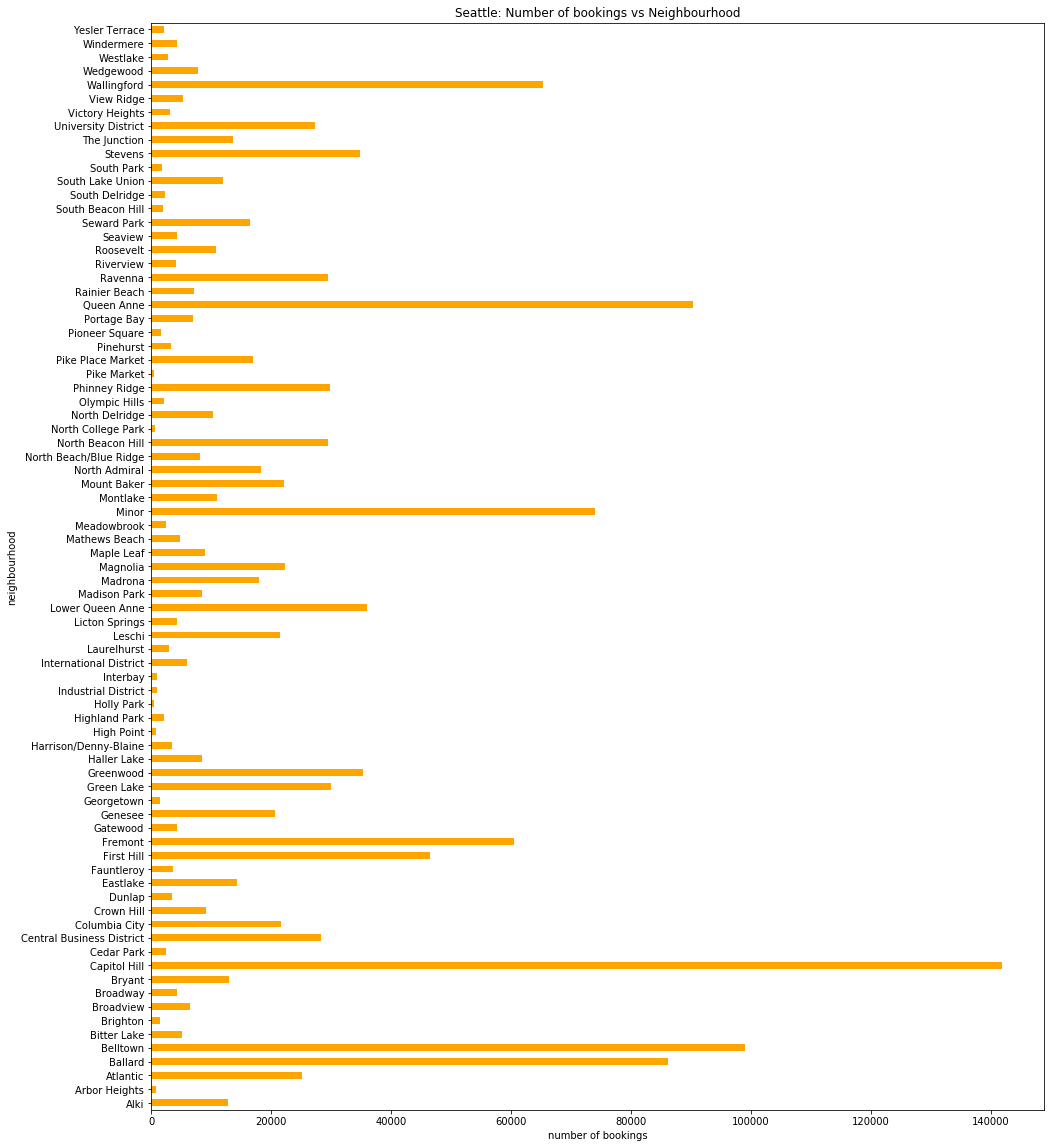

In [20]:
"""Areas that are more likely to be crowded/ areas that are more likely to be 
   preferred by people (based on the number of bookings)?"""

#Bar plot showing the number of bookings in a neighbourhood in Seattle
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(111)
ax.set_title('Seattle: Number of bookings vs Neighbourhood')
ax.set_xlabel('number of bookings')
ax.set_ylabel('neighbourhood')
seattle_merged_df.groupby('neighbourhood')['accommodates'].sum().plot(kind='barh', color='orange', ax=ax)

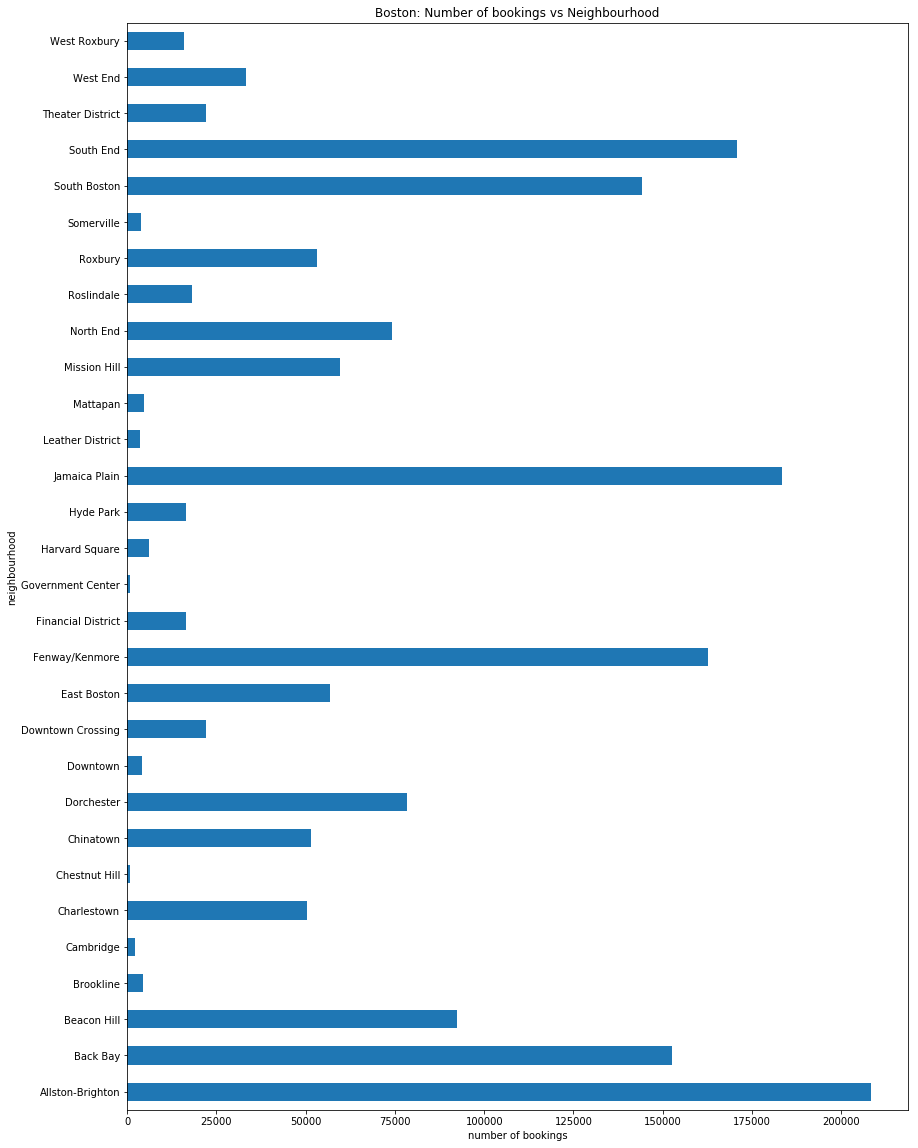

In [21]:
#Bar plot showing the number of bookings in a neighbourhood in Boston    
fig = plt.figure(figsize=(14,20))
ax = fig.add_subplot(111)
ax.set_title('Boston: Number of bookings vs Neighbourhood')
ax.set_xlabel('number of bookings')
ax.set_ylabel('neighbourhood')
boston_merged_df.groupby('neighbourhood')['accommodates'].sum().plot(kind='barh', ax=ax)

In [22]:
"""Predict the price of listings for Seattle/Boston."""

# numeric cols- zipcode, accommodates, bathrooms, bedrooms, beds, cleaning fee
seattle_listings_numeric_df = seattle_listings_df[['accommodates', 'bathrooms_filled', 
                                                   'bedrooms_filled','beds_filled', 
                                                   'cleaning_fee_filled', 'price']]
boston_listings_numeric_df = boston_listings_df[['accommodates', 'bathrooms_filled',
                                                 'bedrooms_filled','beds_filled', 
                                                 'cleaning_fee_filled', 'price']]
#categoric cols- property_type, room_type, neighbourhood, instant_bookable, cancellation_policy
seattle_listings_categoric_df = seattle_listings_df[['zipcode_filled','property_type',
                                                     'room_type','instant_bookable',
                                                     'cancellation_policy']]
boston_listings_categoric_df = boston_listings_df[['zipcode_filled','property_type',
                                                   'room_type','instant_bookable',
                                                   'cancellation_policy']]

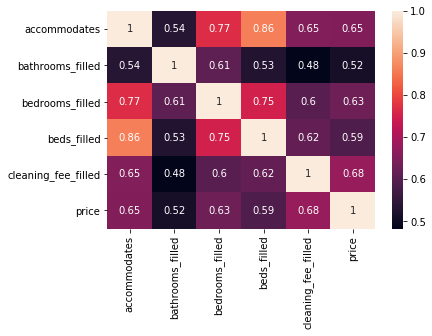

In [23]:
#Corelation matrix(Seattle) for numeric type
corrMatrix_seattle =  seattle_listings_numeric_df.corr()
sn.heatmap(corrMatrix_seattle, annot=True)
plt.show()

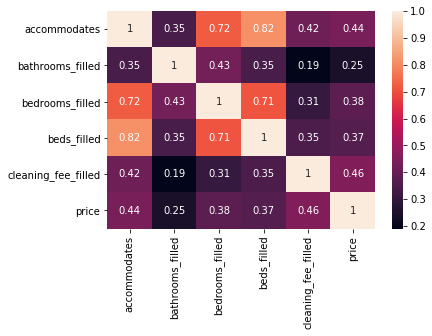

In [24]:
#Corelation matrix(Boston) for numeric type
corrMatrix_boston =  boston_listings_numeric_df.corr()
sn.heatmap(corrMatrix_boston, annot=True)
plt.show()

In [25]:
def create_dummy_df(num_df, cat_df, dummy_na):

    '''
    INPUT:
    num_df - pandas dataframe with numerical variables
    cat_df - pandas dataframe with categorical variables
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not

    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. dummy columns for each of the categorical columns in cat_df
            2. if dummy_na is True - it also contains dummy columns for the NaN values
            3. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in cat_df.columns:

        try:
            num_df = pd.concat([num_df, pd.get_dummies(cat_df[col], prefix=col,
                                                       prefix_sep='_',drop_first=True,
                                                       dummy_na=dummy_na)], axis=1)
        except:
            continue

    return num_df

In [26]:
#Change here to toggle between seattle(seattle_listings_numeric_df) and 
#boston(boston_listings_numeric_df) dataframes
concat_df = create_dummy_df(seattle_listings_numeric_df, seattle_listings_numeric_df, dummy_na=False)

In [27]:
def fit_linear_mod(concat_df, test_size=.3, rand_state=42):
    '''
    INPUT:
    concat_df - a dataframe holding all the variables of interest
    test_size - a float between [0,1] about what proportion of data should
                be in the test dataset
    rand_state - an int that is provided as the random state for splitting 
                 the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    
    X = concat_df.drop('price', axis=1)
    y = concat_df['price']

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                        random_state=rand_state) 

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict and score the model
    y_train_preds = lm_model.predict(X_train) 
    y_test_preds = lm_model.predict(X_test) 

    train_score = r2_score(y_train, y_train_preds)
    test_score = r2_score(y_test, y_test_preds) 
    
    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test

#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = fit_linear_mod(concat_df)

In [28]:
#Print training and testing score
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".\
      format(train_score, test_score))

The rsquared on the training data was 1.0.  The rsquared on the test data was 0.528721602424.
